### Questions

### Objectives
YWBAT
* define linear regression
* create an example of linear regression
* describe what the various parts of the linreg equation do
* calculate the error of a linear regression equation

### What is linear regression?

![](linregimage.png)

### When do we use it?

### Let's make an example with some data!!!!!

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.xkcd()

In [73]:
x_vals = np.linspace(0, 100, 50)

In [74]:
slope = np.random.randint(20, 50)
errors = np.random.normal(100, 200, 50)
bias = np.random.randint(20, 200)

In [75]:
y_vals = slope*x_vals + bias + errors

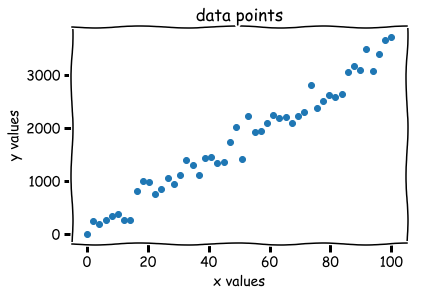

In [76]:
plt.scatter(x_vals, y_vals)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.show()

### Let's check the correlation coefficient

In [77]:
np.corrcoef(x_vals, y_vals)

array([[1.        , 0.98366979],
       [0.98366979, 1.        ]])

In [78]:
### let's just guess a slope
slope_guess = 21
bias_guess = 0

In [79]:
### this yields a y_hat array of
y_hat = slope_guess*x_vals + bias_guess

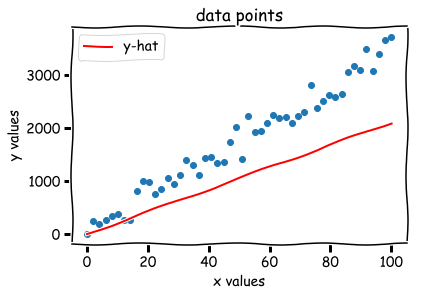

In [80]:
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, y_hat, c='r', label='y-hat')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.legend()
plt.show()

### RMSE equation
![](rmse.png)

In [81]:
### Yikes! How bad is this?

### Let's create our RMSE equations

def RMSE(y_true, y_pred):
    num = np.sum((y_true-y_pred)**2)
    den = np.sum((y_true - y_true.mean())**2)
    return 1 - 1.0*num / den


def RMSE2(y_true, y_pred):
    num = np.sum((y_pred - y_true.mean())**2)
    den = np.sum((y_true - y_true.mean())**2)
    return 1.0 * num / den

In [82]:
RMSE(y_vals, y_hat)

0.349614137436005

In [83]:
RMSE2(y_vals, y_hat)

0.846406783242641

### which one will python use? Let's import from sklearn.metrics

In [84]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_vals, y_hat)

0.349614137436005

### now, how can we do this using statsmodels?

In [86]:
import statsmodels.api as sm

In [87]:
x = sm.add_constant(x_vals)

In [88]:
linreg = sm.OLS(y_vals, x).fit()

In [94]:
summary = linreg.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1434.
Date:                Tue, 07 May 2019   Prob (F-statistic):           2.07e-37
Time:                        21:19:13   Log-Likelihood:                -331.45
No. Observations:                  50   AIC:                             666.9
Df Residuals:                      48   BIC:                             670.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5332     52.073      1.028      0.309     -51.167     158.233
x1            33.9789      0.897     37.865      0.000      32.175      35.783
==============================================================================
Omnibus:                        2.110   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.445
Skew:                           0.172   Prob(JB):                        0.486
Kurtosis:                       2.242   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's interpret this!




----

In [92]:
# how close were we?
slope, bias

(32, 51)

In [107]:
ols_slope, ols_bias = linreg.params
ols_y_hat = ols_slope*x_vals + ols_bias
ols_slope, ols_bias

(53.53323559323411, 33.97888956550166)

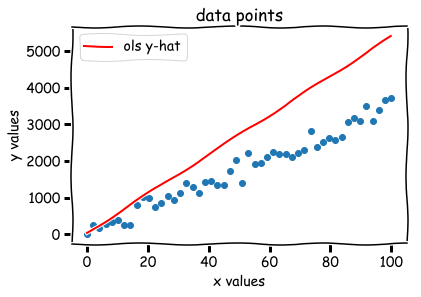

In [106]:
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, ols_y_hat, c='r', label='ols y-hat')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.legend()
plt.show()

In [108]:
best_y_hat = slope*x_vals + bias

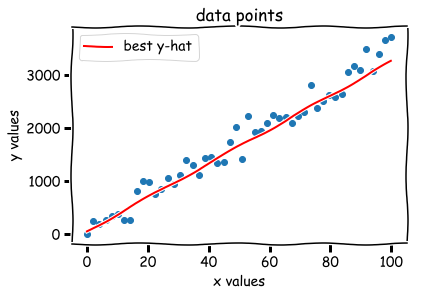

In [109]:
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, best_y_hat, c='r', label='best y-hat')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.legend()
plt.show()

### what did we learn?